# Project Summary

In [2]:
import sys
import pickle
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("classic")
import seaborn as sns
from scipy import stats

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [356]:
pp = pprint.PrettyPrinter(indent=4)
sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 150

# Data Exploration

In [1218]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
discovery_df = pd.DataFrame(data_dict).transpose().apply(pd.to_numeric, errors='coerce')

In [1194]:
discovery_df.shape

(146, 21)

In [1220]:
discovery_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82.00,39.00,49.00,17.00,0.00,102.00,95.00,86.00,86.00,86.00,4.00,66.00,93.00,110.00,18.00,95.00,86.00,86.00,125.00,126.00
mean,2374234.61,1642674.15,-1140475.14,166804.88,nan,5987053.77,108728.92,608.79,64.90,41.23,41962500.00,1470361.45,919064.97,2321741.14,166410.56,562194.29,1176.47,2073.86,5081526.49,6773957.45
std,10713327.97,5161929.97,4025406.38,319891.41,nan,31062006.57,533534.81,1841.03,86.98,100.07,47083208.70,5942759.32,4589252.91,12518278.18,4201494.31,2716369.15,1178.32,2582.70,29061716.40,38957772.73
min,70000.00,-102500.00,-27992891.00,3285.00,nan,3285.00,148.00,12.00,0.00,0.00,400000.00,69223.00,2.00,-2604490.00,-7576788.00,477.00,2.00,57.00,148.00,-44093.00
25%,431250.00,81573.00,-694862.00,98784.00,nan,527886.25,22614.00,22.75,10.00,1.00,1600000.00,281250.00,1215.00,254018.00,-389621.75,211816.00,249.75,541.25,394475.00,494510.25
50%,769375.00,227449.00,-159792.00,108579.00,nan,1310813.50,46950.00,41.00,35.00,8.00,41762500.00,442035.00,52382.00,451740.00,-146975.00,259996.00,740.50,1211.00,1101393.00,1102872.50
75%,1200000.00,1002671.50,-38346.00,113784.00,nan,2547724.00,79952.50,145.50,72.25,24.75,82125000.00,938672.00,362096.00,1002369.75,-75009.75,312117.00,1888.25,2634.75,2093263.00,2949846.75
max,97343619.00,32083396.00,-833.00,1398517.00,nan,311764000.00,5235198.00,14368.00,528.00,609.00,83925000.00,48521928.00,42667589.00,130322299.00,15456290.00,26704229.00,5521.00,15149.00,309886585.00,434509511.00


In [1198]:
discovery_df.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                float64
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

In [1185]:
# discovery_df = discovery_df.apply(pd.to_numeric(errors='coerce'))
# discovery_df = pd.to_numeric(discovery_df, errors='coerce')
discovery_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,NaN,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,NaN,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,NaN,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,NaN,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


In [1078]:
# POI's
list(discovery_df.index)

['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

In [1080]:
# Features
list(discovery_df.columns)

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [1085]:
# 'deferred_income' and 'restricted_stock_deferred" are observed as negative values
discovery_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [ ]:
# num persons (rows)
# list of names 
# persons of interest
# # Of these three individuals (Lay, Skilling and Fastow), who took home the most money (largest value of "total_payments" feature)? How much money did that person get?

# Task 1: Select Features

- Task 1: Select what features you'll use.
- features_list is a list of strings, each of which is a feature name.
- The first feature must be "poi".

In [6]:
features_list = [
    "poi",
    "salary",
    "bonus",
    "long_term_incentive",
    "exercised_stock_options",
    "total_payments",
]  # You will need to use more features

In [232]:
discovery_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,42,40,45,18,112,102,95,65,58,42,5,53,93,2,98,19,95,84,87,126,125
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,107,97,129,35,44,51,60,60,60,142,80,53,128,36,128,51,60,60,21,20


In [1235]:
# define 'NaN' strings as numpy NaNs
discovery_df[discovery_df == 'NaN'] = np.nan

# sort the features by the % NaN values for the feature
pct_missing_values_df = pd.DataFrame(data=((discovery_df.isna().sum() / len(discovery_df.index)) * 100), columns = ["% Missing Values"])

# Set the index name
pct_missing_values_df = pct_missing_values_df.rename_axis("Feature")
pct_missing_values_df.sort_values(by="% Missing Values", inplace=True)

# drop irrelevant features
pct_missing_values_df = pct_missing_values_df.drop(['email_address', 'other'], axis=0, errors='ignore')

pct_missing_values_df = pct_missing_values_df[(pct_missing_values_df["% Missing Values"] < 50)]


display(pct_missing_values_df)
cols_with_values = list(pct_missing_values_df.index)
cols_with_values

,% Missing Values
Feature,
poi,0.00
total_stock_value,13.70
total_payments,14.38
restricted_stock,24.66
exercised_stock_options,30.14
salary,34.93
expenses,34.93
to_messages,41.10
shared_receipt_with_poi,41.10


['poi',
 'total_stock_value',
 'total_payments',
 'restricted_stock',
 'exercised_stock_options',
 'salary',
 'expenses',
 'to_messages',
 'shared_receipt_with_poi',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'bonus']

In [1236]:
discovery_df[cols_with_values].describe()

,total_stock_value,total_payments,restricted_stock,exercised_stock_options,salary,expenses,to_messages,shared_receipt_with_poi,from_messages,from_poi_to_this_person,from_this_person_to_poi,bonus
count,126.00,125.00,110.00,102.00,95.00,95.00,86.00,86.00,86.00,86.00,86.00,82.00
mean,6773957.45,5081526.49,2321741.14,5987053.77,562194.29,108728.92,2073.86,1176.47,608.79,64.90,41.23,2374234.61
std,38957772.73,29061716.40,12518278.18,31062006.57,2716369.15,533534.81,2582.70,1178.32,1841.03,86.98,100.07,10713327.97
min,-44093.00,148.00,-2604490.00,3285.00,477.00,148.00,57.00,2.00,12.00,0.00,0.00,70000.00
25%,494510.25,394475.00,254018.00,527886.25,211816.00,22614.00,541.25,249.75,22.75,10.00,1.00,431250.00
50%,1102872.50,1101393.00,451740.00,1310813.50,259996.00,46950.00,1211.00,740.50,41.00,35.00,8.00,769375.00
75%,2949846.75,2093263.00,1002369.75,2547724.00,312117.00,79952.50,2634.75,1888.25,145.50,72.25,24.75,1200000.00
max,434509511.00,309886585.00,130322299.00,311764000.00,26704229.00,5235198.00,15149.00,5521.00,14368.00,528.00,609.00,97343619.00


In [1284]:
# the max values seem large, so check which "POI" has the max value
display(discovery_df[[c for c in cols_with_values if c != "poi"]].idxmax())

# remove the "TOTAL" POI which is an outlier because it's an aggregate value
discovery_df = discovery_df[cols_with_values].drop("TOTAL", errors="ignore")

# validate that we've removed aggregates and non-POIs
discovery_df[[c for c in cols_with_values if c != "poi"]].idxmax()

discovery_df[cols_with_values].describe()

total_stock_value                LAY KENNETH L
total_payments                   LAY KENNETH L
restricted_stock                 LAY KENNETH L
exercised_stock_options          LAY KENNETH L
salary                      SKILLING JEFFREY K
expenses                      MCCLELLAN GEORGE
to_messages                  SHAPIRO RICHARD S
shared_receipt_with_poi       BELDEN TIMOTHY N
from_messages              KAMINSKI WINCENTY J
from_poi_to_this_person        LAVORATO JOHN J
from_this_person_to_poi       DELAINEY DAVID W
bonus                          LAVORATO JOHN J
dtype: object

,total_stock_value,total_payments,restricted_stock,exercised_stock_options,salary,expenses,to_messages,shared_receipt_with_poi,from_messages,from_poi_to_this_person,from_this_person_to_poi,bonus
count,125.00,124.00,109.00,101.00,94.00,94.00,86.00,86.00,86.00,86.00,86.00,81.00
mean,3352073.02,2623421.18,1147424.09,2959559.26,284087.54,54192.01,2073.86,1176.47,608.79,64.90,41.23,1201773.07
std,6532883.10,9488105.53,2249770.36,5499449.60,177131.12,46108.38,2582.70,1178.32,1841.03,86.98,100.07,1441679.44
min,-44093.00,148.00,-2604490.00,3285.00,477.00,148.00,57.00,2.00,12.00,0.00,0.00,70000.00
25%,494136.00,386380.25,252055.00,506765.00,211802.00,22479.00,541.25,249.75,22.75,10.00,1.00,425000.00
50%,1095040.00,1100246.50,441096.00,1297049.00,258741.00,46547.50,1211.00,740.50,41.00,35.00,8.00,750000.00
75%,2606763.00,2084662.75,985032.00,2542813.00,308606.50,78408.50,2634.75,1888.25,145.50,72.25,24.75,1200000.00
max,49110078.00,103559793.00,14761694.00,34348384.00,1111258.00,228763.00,15149.00,5521.00,14368.00,528.00,609.00,8000000.00


In [1296]:
# inspect the variance across features
feature_variance = discovery_df[cols_with_values].var().sort_values()
display(feature_variance)

high_variance_features = list(feature_variance[-10:].index)

poi                                    0.11
from_poi_to_this_person             7565.39
from_this_person_to_poi            10014.63
shared_receipt_with_poi          1388432.46
from_messages                    3389406.00
to_messages                      6670344.36
expenses                      2125982471.43
salary                       31375432034.87
bonus                      2078439602903.44
restricted_stock           5061466658800.40
exercised_stock_options   30243945891878.36
total_stock_value         42678561561688.52
total_payments            90024146625871.03
dtype: float64

In [1394]:
# inspect the correlation between high variance features
feature_corr_df = discovery_df[high_variance_features + ['poi']].corr()

# total_stock_value, exercised_stock_options
display("Feature Correlation", feature_corr_df)

# values with high correlation to POI
display("Features With High Correlation to 'POI' Feature", feature_corr_df.poi.apply(abs).sort_values(ascending=False))

high_corr_filter = (abs(feature_corr_df) >= 0.5) & (feature_corr_df != 1)
low_corr_filter = (abs(feature_corr_df) < 0.5)

# exercised_stock_options, shared_receipt_with_poi, from_messages
display("Features With High Correlation", feature_corr_df[high_corr_filter].fillna("-"))

display("# Features With High Correlation To Feature", feature_corr_df[high_corr_filter].agg(["count", "mean"], axis='columns',).sort_values("count", ascending=False))
display("# Features With Low Correlation To Feature", feature_corr_df[low_corr_filter].agg(["count", "mean"], axis='columns',).sort_values("count", ascending=False))

'Feature Correlation'

,shared_receipt_with_poi,from_messages,to_messages,expenses,salary,bonus,restricted_stock,exercised_stock_options,total_stock_value,total_payments,poi
shared_receipt_with_poi,1.00,0.23,0.85,0.22,0.28,0.55,0.23,0.15,0.18,0.19,0.23
from_messages,0.23,1.00,0.48,0.09,-0.00,0.05,0.00,-0.07,-0.04,-0.03,-0.07
to_messages,0.85,0.48,1.00,0.16,0.19,0.37,0.20,0.08,0.12,0.13,0.06
expenses,0.22,0.09,0.16,1.00,0.15,0.03,0.04,0.02,0.03,0.11,0.06
salary,0.28,-0.00,0.19,0.15,1.00,0.52,0.55,0.61,0.61,0.58,0.26
bonus,0.55,0.05,0.37,0.03,0.52,1.00,0.38,0.51,0.51,0.57,0.30
restricted_stock,0.23,0.00,0.20,0.04,0.55,0.38,1.00,0.69,0.86,0.60,0.22
exercised_stock_options,0.15,-0.07,0.08,0.02,0.61,0.51,0.69,1.00,0.96,0.59,0.50
total_stock_value,0.18,-0.04,0.12,0.03,0.61,0.51,0.86,0.96,1.00,0.67,0.37
total_payments,0.19,-0.03,0.13,0.11,0.58,0.57,0.60,0.59,0.67,1.00,0.23


"Features With High Correlation to 'POI' Feature"

poi                       1.00
exercised_stock_options   0.50
total_stock_value         0.37
bonus                     0.30
salary                    0.26
total_payments            0.23
shared_receipt_with_poi   0.23
restricted_stock          0.22
from_messages             0.07
expenses                  0.06
to_messages               0.06
Name: poi, dtype: float64

'Features With High Correlation'

,shared_receipt_with_poi,from_messages,to_messages,expenses,salary,bonus,restricted_stock,exercised_stock_options,total_stock_value,total_payments,poi
shared_receipt_with_poi,-,-,0.85,-,-,0.55,-,-,-,-,-
from_messages,-,-,-,-,-,-,-,-,-,-,-
to_messages,0.85,-,-,-,-,-,-,-,-,-,-
expenses,-,-,-,-,-,-,-,-,-,-,-
salary,-,-,-,-,-,0.52,0.55,0.61,0.61,0.58,-
bonus,0.55,-,-,-,0.52,-,-,0.51,0.51,0.57,-
restricted_stock,-,-,-,-,0.55,-,-,0.69,0.86,0.60,-
exercised_stock_options,-,-,-,-,0.61,0.51,0.69,-,0.96,0.59,0.50
total_stock_value,-,-,-,-,0.61,0.51,0.86,0.96,-,0.67,-
total_payments,-,-,-,-,0.58,0.57,0.60,0.59,0.67,-,-


'# Features With High Correlation To Feature'

,count,mean
exercised_stock_options,6.00,0.64
salary,5.00,0.58
bonus,5.00,0.53
total_stock_value,5.00,0.72
total_payments,5.00,0.60
restricted_stock,4.00,0.67
shared_receipt_with_poi,2.00,0.70
to_messages,1.00,0.85
poi,1.00,0.50
from_messages,0.00,nan


'# Features With Low Correlation To Feature'

,count,mean
from_messages,10.00,0.06
expenses,10.00,0.09
to_messages,9.00,0.20
poi,9.00,0.18
shared_receipt_with_poi,8.00,0.22
restricted_stock,6.00,0.18
salary,5.00,0.18
bonus,5.00,0.23
total_stock_value,5.00,0.13
total_payments,5.00,0.13


In [ ]:
discovery_df[cols_with_values].var

# Task 2: Remove outliers

In [1027]:
df = pd.DataFrame(data_dict)

# remove the TOTAL key from the dict because it's an outlier in the data
# TOTAL represents an aggregate value
# 'THE TRAVEL AGENCY IN THE PARK' doesn't represent a person
df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'], errors='ignore')
df[df == 'NaN'] = np.NaN
df = df.fillna(0)

numRows, numCols = df.shape
# transpose the DF if the features are set as rows
if numRows < numCols:
    df = pd.DataFrame(df).transpose()

df[features_list].head()

,poi,salary,bonus,long_term_incentive,exercised_stock_options,total_payments
ALLEN PHILLIP K,False,201955,4175000,304805,1729541,4484442
BADUM JAMES P,False,0,0,0,257817,182466
BANNANTINE JAMES M,False,477,0,0,4046157,916197
BAXTER JOHN C,False,267102,1200000,1586055,6680544,5634343
BAY FRANKLIN R,False,239671,400000,0,0,827696


In [973]:
# TODO: What percentage of POI's in dataset are missing info for this feature?
def summarizeFeature(feature):
    print "\nSUMMARY FOR: '{}'".format(feature.upper())
    print "=" * 25
#     print(df[feature].astype(np.float64).describe())
    print(df[feature].astype(np.float64).describe())
    print
    
# summarize selected features (except for POI)    
for feature in features_list[1:]:
    summarizeFeature(feature)    


SUMMARY FOR: 'SALARY'
count         95.00
mean      562194.29
std      2716369.15
min          477.00
25%       211816.00
50%       259996.00
75%       312117.00
max     26704229.00
Name: salary, dtype: float64


SUMMARY FOR: 'BONUS'
count         82.00
mean     2374234.61
std     10713327.97
min        70000.00
25%       431250.00
50%       769375.00
75%      1200000.00
max     97343619.00
Name: bonus, dtype: float64


SUMMARY FOR: 'LONG_TERM_INCENTIVE'
count         66.00
mean     1470361.45
std      5942759.32
min        69223.00
25%       281250.00
50%       442035.00
75%       938672.00
max     48521928.00
Name: long_term_incentive, dtype: float64


SUMMARY FOR: 'EXERCISED_STOCK_OPTIONS'
count         102.00
mean      5987053.77
std      31062006.57
min          3285.00
25%        527886.25
50%       1310813.50
75%       2547724.00
max     311764000.00
Name: exercised_stock_options, dtype: float64


SUMMARY FOR: 'TOTAL_PAYMENTS'
count         125.00
mean      5081526.49
std      

In [357]:
def Draw(
    pred,
    features,
    poi,
    mark_poi=False,
    name="image.png",
    f1_name="feature 1",
    f2_name="feature 2",
):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color=colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


In [981]:
def plotData(data_dict, features, xLabel, yLabel):
    data = featureFormat(data_dict, features=features)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('POIs with {} and {}:'.format(yLabel.upper(), xLabel.upper()), loc='center')
    feature_x, feature_y = features

    zScores = abs(stats.zscore(data, axis=0))

    #  plot data points
    for index, (x, y) in enumerate(data):
        xZ, yZ = zScores[index]
        plt.scatter(x, y)
        
        # annotate the data point if X or Y is greater than 2 Stdevs.
        if xZ > 2 or yZ > 2:
            # find the person associated with the data point
            poi_name = next((key for (key, value) in data_dict.items() if value.get(feature_x) == x or value.get(feature_y) == y), None)
            
            ax.annotate("%s" % (poi_name), xy=(x, y), textcoords="data")

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.grid(True)
    plt.figure()
    plt.show()

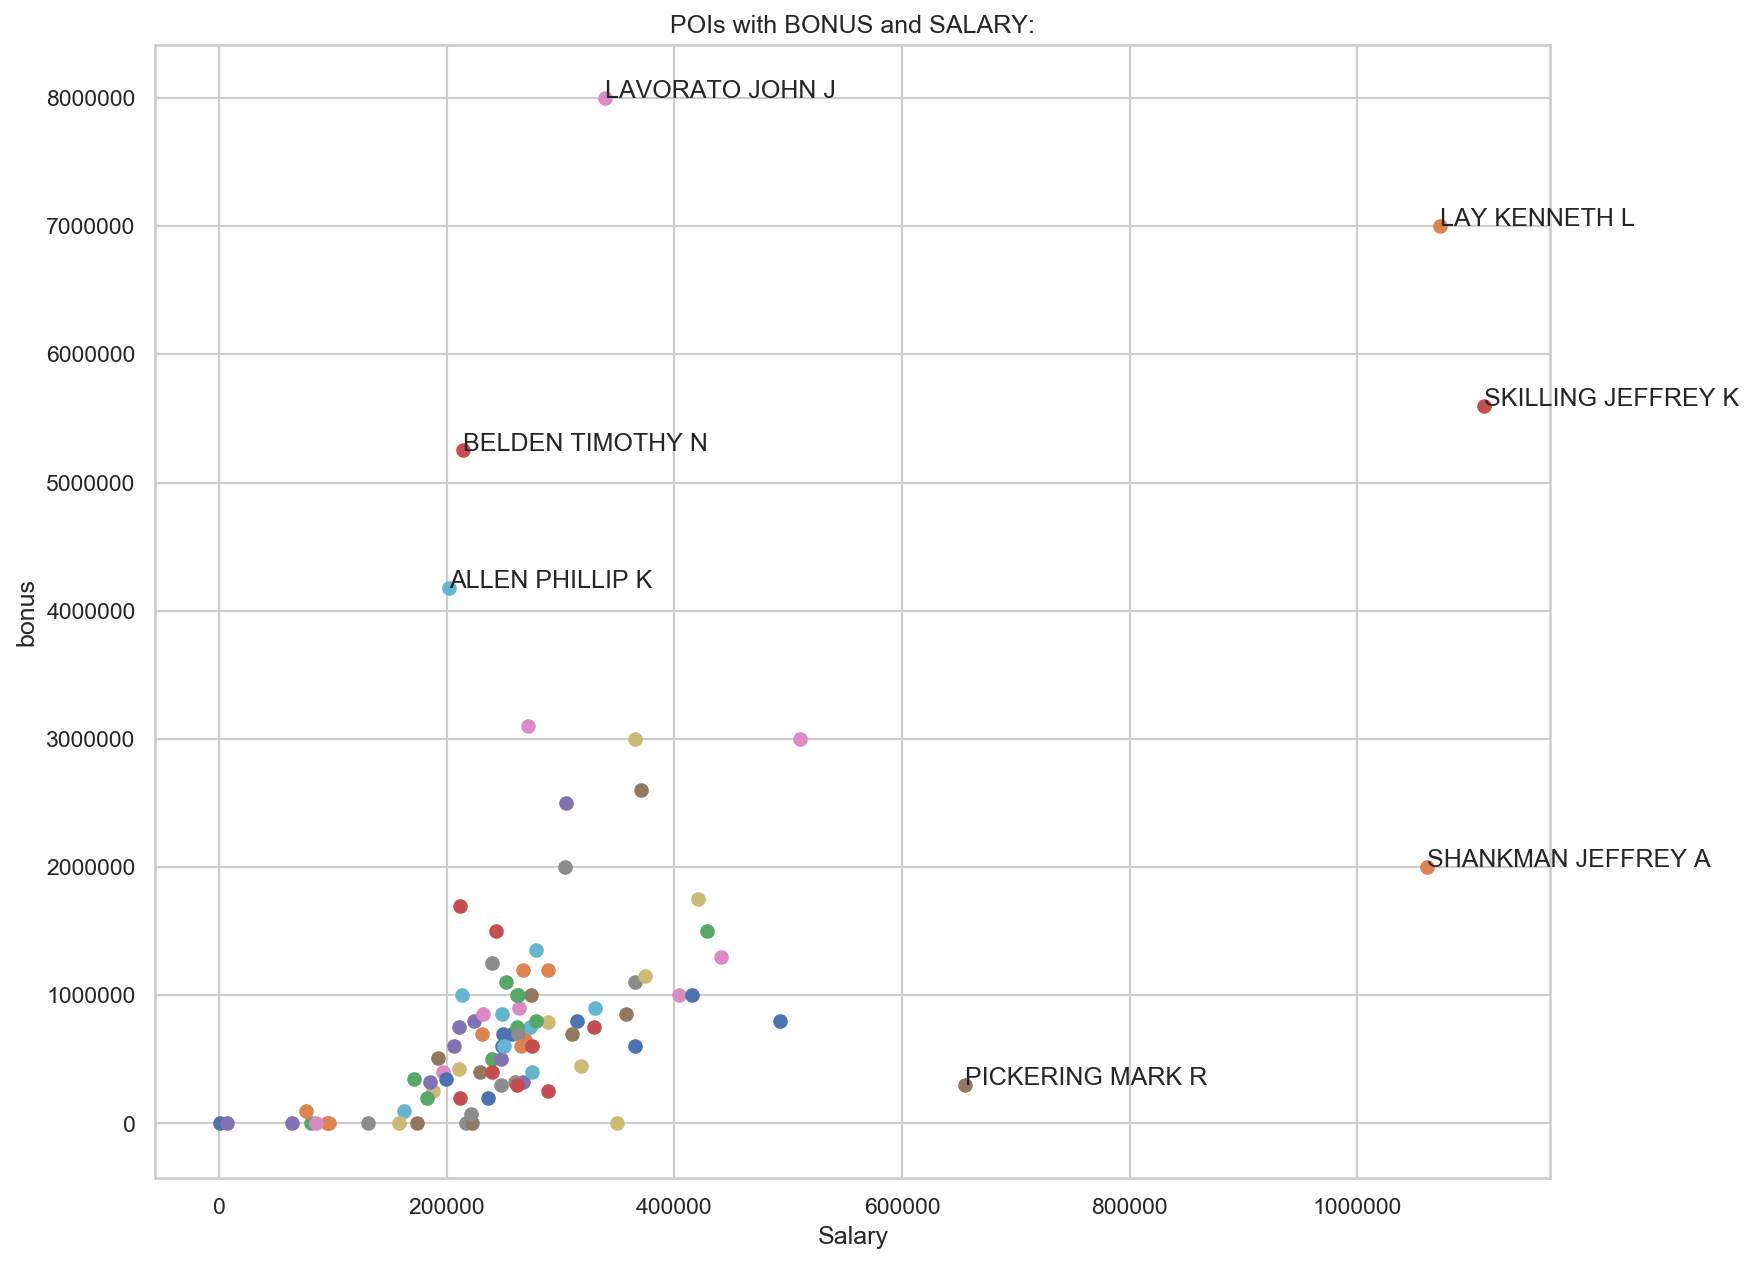

<Figure size 1800x1500 with 0 Axes>

In [333]:
plotData(data_dict, features=["salary", features_list[2]], xLabel="Salary", yLabel=features_list[2])

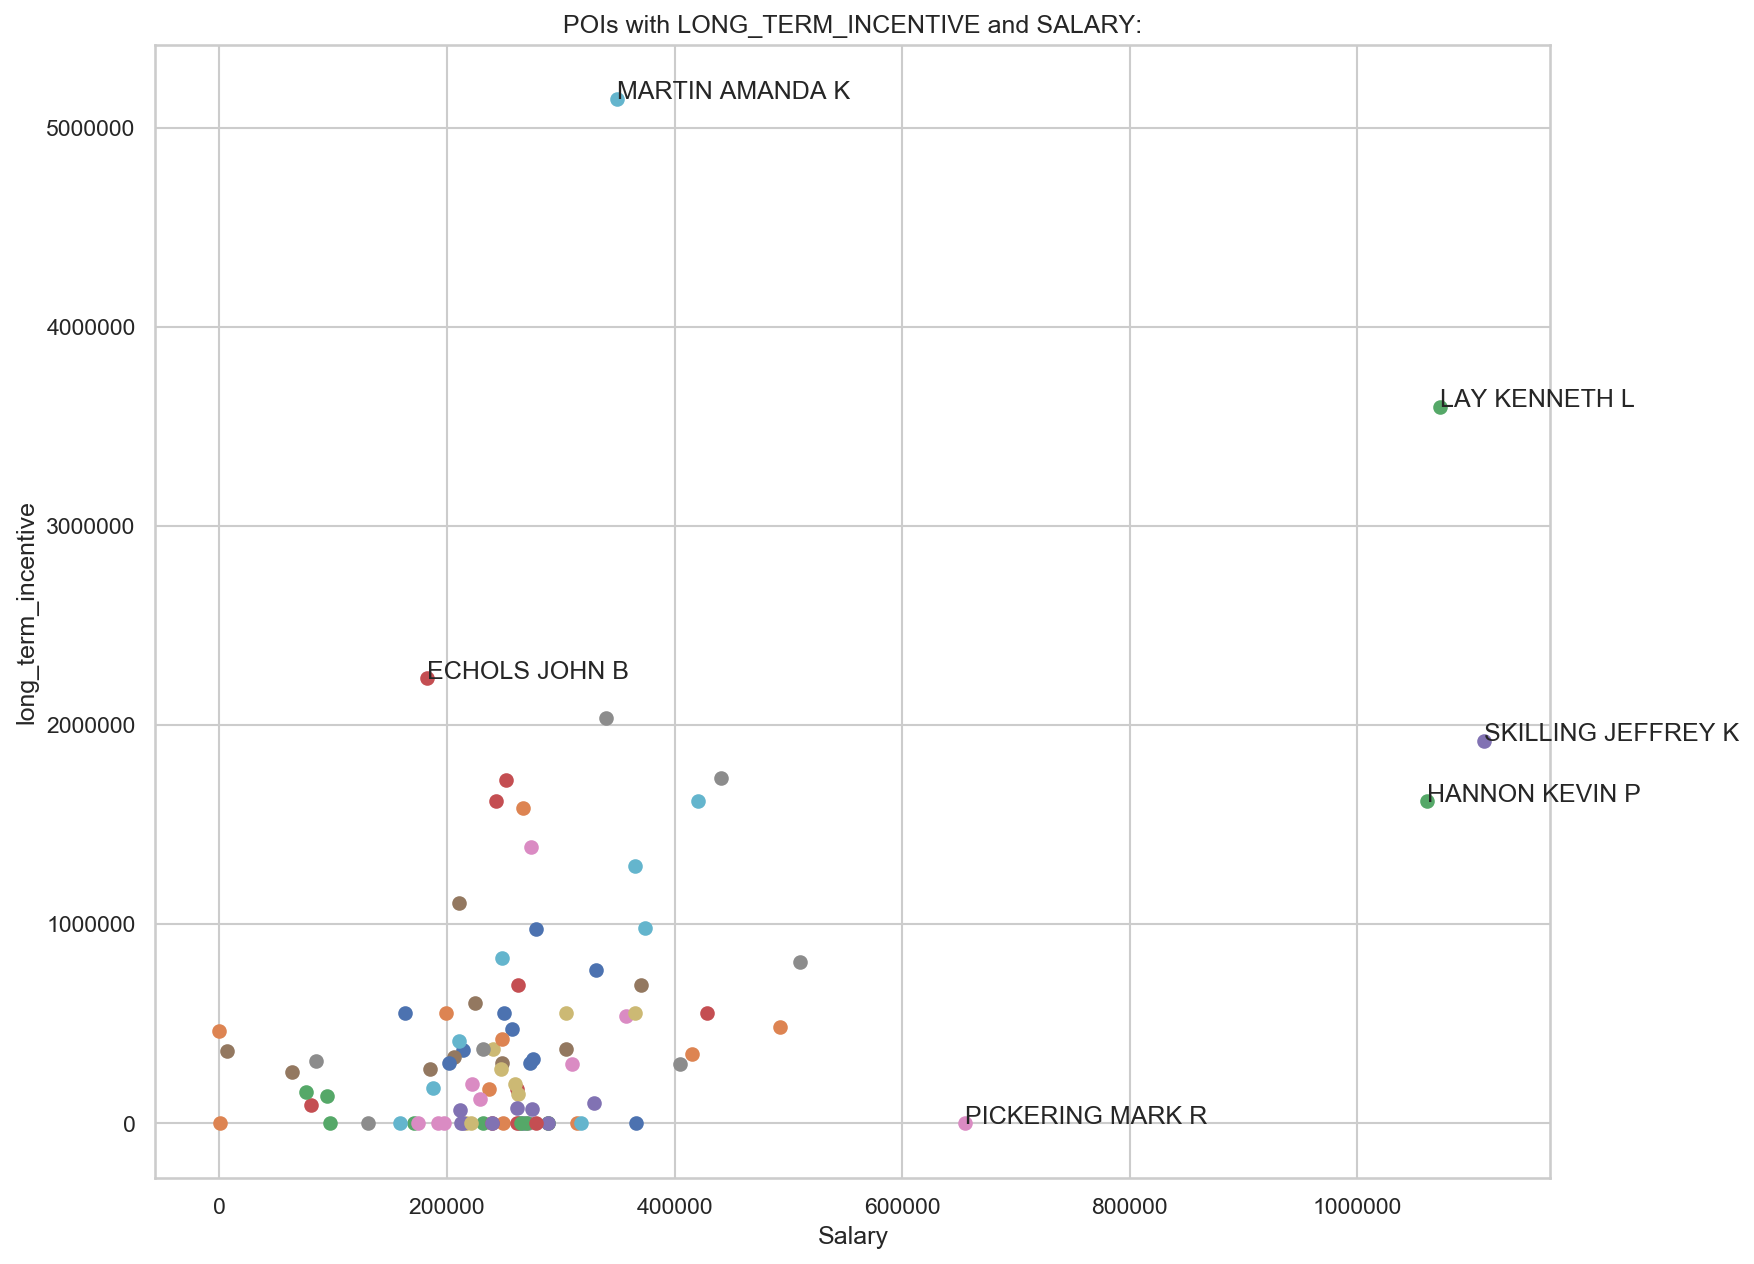

<Figure size 1800x1500 with 0 Axes>

In [334]:
plotData(data_dict, features=["salary", features_list[3]], xLabel="Salary", yLabel=features_list[3])

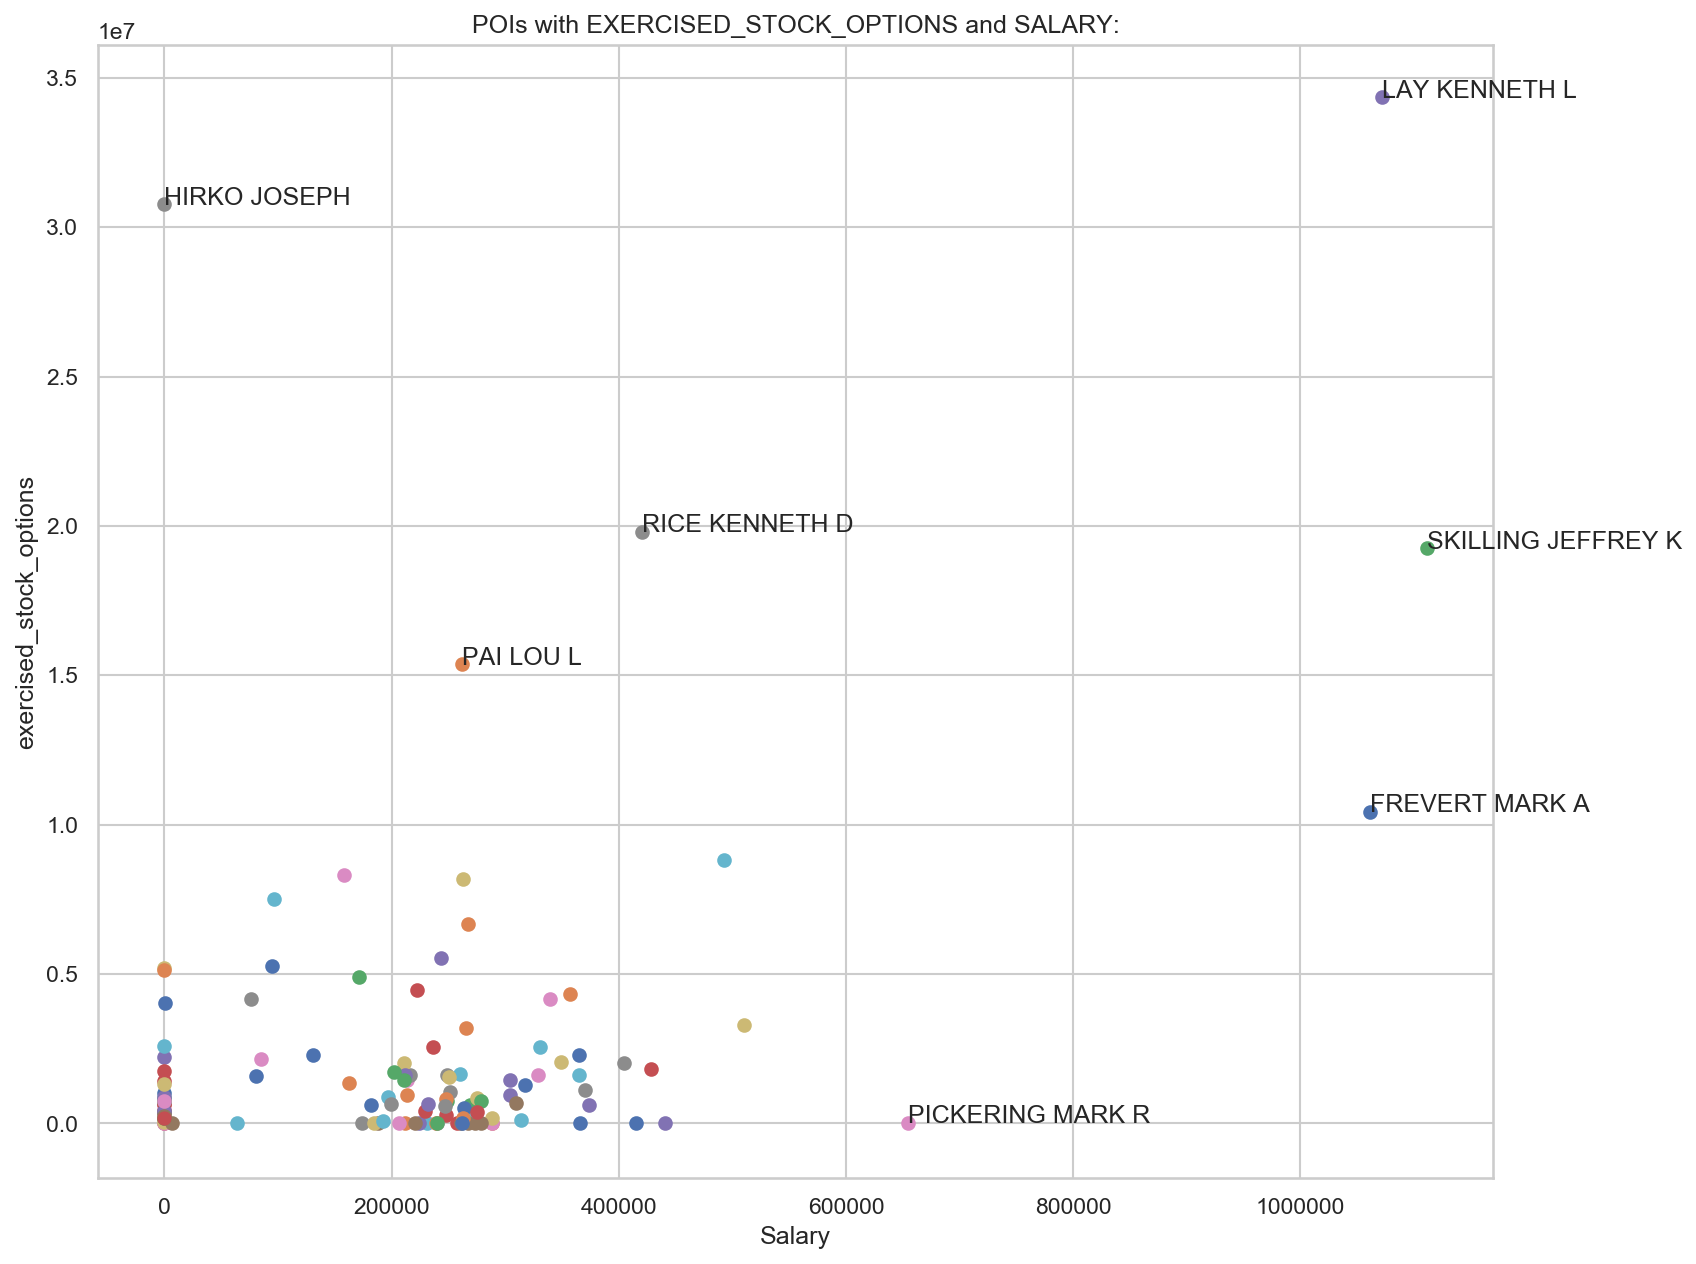

<Figure size 1800x1500 with 0 Axes>

In [335]:
plotData(data_dict, features=["salary", features_list[4]], xLabel="Salary", yLabel=features_list[4])

In [293]:
from pandas.io.json import json_normalize

salary_df = df[df.salary != 'NaN']
bonus_df = df[df.bonus != 'NaN']
long_term_incentive_df = df[df.long_term_incentive!= 'NaN']
exercised_stock_options_df = df[df.exercised_stock_options != 'NaN']
total_payments_df = df[df.total_payments != 'NaN']

total_payments_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,NaN,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,NaN,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,NaN,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,NaN,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,NaN,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,NaN,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,NaN,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,NaN,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


# Task 3: Create Features

In [1045]:
df = df.fillna(0)

def calculate_poi_msgs(x):
    total_msgs = x["from_messages"] + x["to_messages"]
    x["poi_messages"] = 0
    
    if total_msgs > 0:
        x["poi_messages"] = ((x["from_poi_to_this_person"] + x["from_this_person_to_poi"]) / float(total_msgs)) * 100

    return x["poi_messages"]
    
# total_msgs = (df.loc[:, "from_messages"] + df.loc[:, "to_messages"])
# df["poi_messages"] = ((df.loc[:, "from_poi_to_this_person"] + df.loc[:, "from_this_person_to_poi"])
#                       / total_msgs ) * 100

df["poi_messages"] = df.apply(calculate_poi_msgs, axis=1)

display(df[features_list + ["poi_messages"]].head())

summarizeFeature("poi_messages")
### Store to my_dataset for easy export below.
# my_dataset = data_dict
my_dataset = df[features_list + ["poi_messages"]].transpose().to_dict()

# display({key: value if value != 'nan' else 'NaN' for (key, value) in my_dataset.items()})

# for key, value in my_dataset.items():
#     for data_key, data_value in my_dataset
#     display(value)
# {index -1: feature for (index, feature) in enumerate(features_list) if feature is not 'poi'}

# display(df)
# what percent of total messages are To or From a POI?
feature_1, feature_2 = 'long_term_incentive', 'bonus'
# feature_1, feature_2 = 'deferred_income', 'bonus'
# feature_1, feature_2 = 'deferral_payments', 'bonus'
# feature_1, feature_2 = 'deferral_payments', 'deferred_income'
# feature_1, feature_2 = 'long_term_incentive', 'deferral_payments'
# feature_1, feature_2 = 'long_term_incentive', 'deferred_income'
feature_1, feature_2 = 'long_term_incentive', "poi_messages"
feature_1, feature_2 = 'bonus', "poi_messages"
# feature_2 = 'exercised_stock_options'
# feature_2 = 'total_payments'
# feature_2 = 'salary'

# bonus                       43.84
# long_term_incentive         54.79
# deferred_income             66.44
# deferral_payments           73.29
poi = 'poi'


# print(data_dict)
### Extract features and labels from dataset for local testing
# features_list = ['poi', 'salary', 'bonus', 'long_term_incentive', 'exercised_stock_options', 'total_payments']
data = featureFormat(my_dataset, [poi, feature_1, feature_2], sort_keys=True, remove_NaN=True)
# display(data)
# data = featureFormat(my_dataset, features_list, sort_keys=True)
labels, features = targetFeatureSplit(data)

# display(features)

print "Number of original features: {}".format(len(features))


feat1, feat2 = zip(*features)
# feat1, feat2, _, _, _  = zip(*features)
feat1 = np.array(feat1).reshape((-1, 1))
feat2 = np.array(feat2).reshape((-1, 1))

scaler = MinMaxScaler()
rescaled_feat1 = scaler.fit_transform(feat1)
scaler = MinMaxScaler()
rescaled_feat2 = scaler.fit_transform(feat2)

# table comparing rescaled features
display(pd.DataFrame({'feat1': feat1.reshape(-1), 'rescaled_feat1': rescaled_feat1.reshape(-1), 'feat2': feat2.reshape(-1), 'rescaled_feat2': rescaled_feat2.reshape(-1)}, columns=['feat1', 'rescaled_feat1', 'feat2', 'rescaled_feat2']).head())

# zip normalized-features back together
features = zip(rescaled_feat1.reshape(-1), rescaled_feat2.reshape(-1))

# save 30% of data for testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=1
)


target_feature_df = pd.DataFrame(features)
# map numeric column names to feature names
col_names = {index -1: feature for (index, feature) in enumerate(features_list) if feature is not 'poi'}
target_feature_df.rename(columns=col_names)
print "Number of rescaled features: {}".format(len(features))

,poi,salary,bonus,long_term_incentive,exercised_stock_options,total_payments,poi_messages
ALLEN PHILLIP K,False,201955,4175000,304805,1729541,4484442,2.20
BADUM JAMES P,False,0,0,0,257817,182466,0.00
BANNANTINE JAMES M,False,477,0,0,4046157,916197,6.55
BAXTER JOHN C,False,267102,1200000,1586055,6680544,5634343,0.00
BAY FRANKLIN R,False,239671,400000,0,0,827696,0.00



SUMMARY FOR: 'POI_MESSAGES'
count   146.00
mean      2.81
std       4.27
min       0.00
25%       0.00
50%       0.79
75%       4.25
max      22.44
Name: poi_messages, dtype: float64

Number of original features: 100


,feat1,rescaled_feat1,feat2,rescaled_feat2
0,4175000.00,0.04,2.20,0.10
1,0.00,0.00,6.55,0.29
2,1200000.00,0.01,0.00,0.00
3,400000.00,0.00,0.00,0.00
4,700000.00,0.01,4.55,0.20


Number of rescaled features: 100


In [783]:
from sklearn.decomposition import PCA

# Principal component analysis (PCA).
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
pca = PCA(n_components=2,)
pca.fit(features_train)

# Percentage of variance explained by each of the selected components.
# [0.73318345 0.26681655]
print(pca.explained_variance_ratio_)

pc1, pc2 = pca.components_
print(pc1, pc2)

features_train = pca.transform(features_train)
features_test = pca.transform(features_test)
# print(features_train_pca)

[0.73318345 0.26681655]
(array([0.57044131, 0.82133836]), array([ 0.82133836, -0.57044131]))


# Task 4: Try a variety of classifiers

In [558]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Best estimator found by grid search:
GaussianNB(priors=None, var_smoothing=1e-09)

30 predictions / 30 test data points


/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'PREDICTIONS: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


'TEST: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


1 POIs detected

              precision    recall  f1-score   support

     NOT POI       0.79      0.96      0.87        24
         POI       0.00      0.00      0.00         6

   micro avg       0.77      0.77      0.77        30
   macro avg       0.40      0.48      0.43        30
weighted avg       0.63      0.77      0.69        30

[[23  1]
 [ 6  0]]
('Gaussian Accuracy: bonus x poi_messages', 0.7666666666666667)


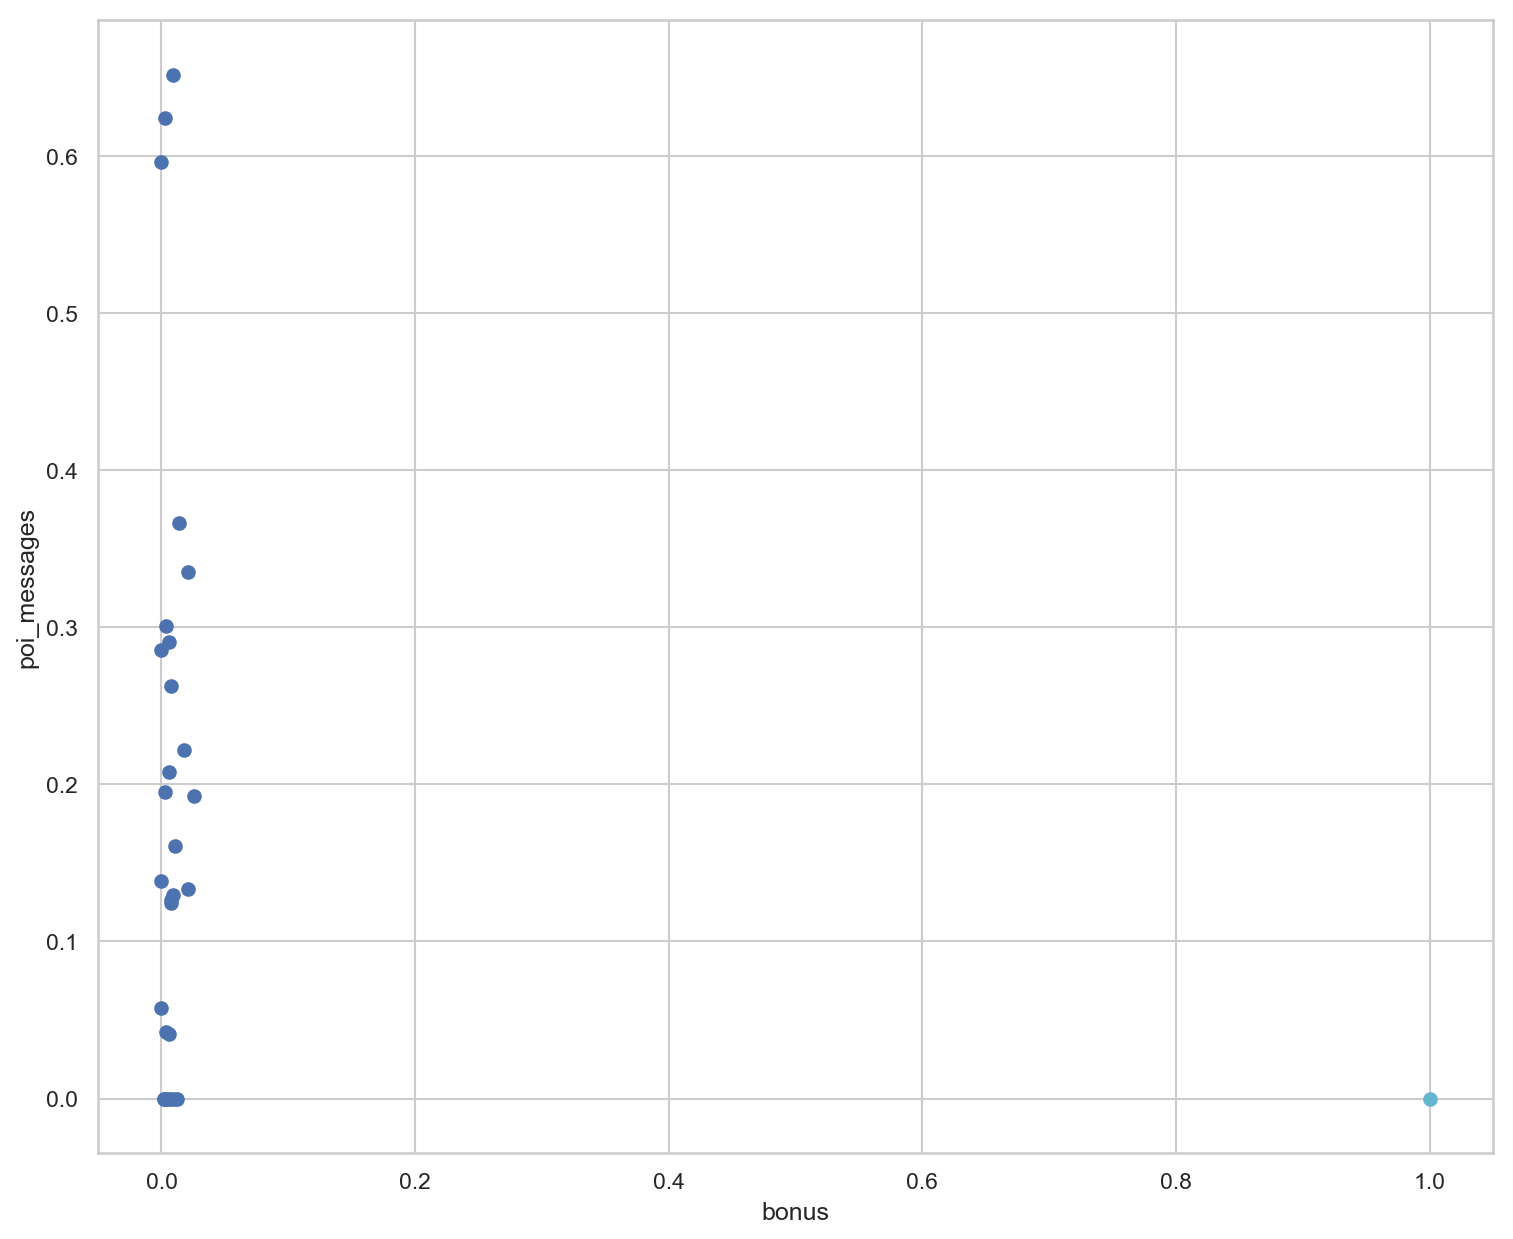

In [1046]:
param_grid = {}

clf = GridSearchCV(GaussianNB(), param_grid)

# clf.fit(X=features_train, y=labels_train)
clf.fit(X=features_train, y=labels_train)

# pred = clf.predict(features_test)

#PCA
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_

printPredictions(pred, labels_test)

printValidationReports(labels_test, pred)

# ('Gaussian Accuracy: PRE PCA', 0.8518518518518519)
# ('Gaussian Accuracy: PCA', 0.8888888888888888)
# ('Gaussian Accuracy: WITHOUT PCA, LRI + bonus?', 0.8857142857142857)
# 5 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.93      0.93      0.93        30
#          POI       0.60      0.60      0.60         5

# ('Gaussian Accuracy: deferred_income x bonus', 0.896551724137931)
# 2 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.89      1.00      0.94        24
#          POI       1.00      0.40      0.57         5


# ('Gaussian Accuracy: deferral_payments x bonus', 0.7666666666666667)
# ('Gaussian Accuracy: deferral_payments x deferred_income', 0.8095238095238095)
# ('Gaussian Accuracy: long_term_incentive x deferral_payments', 0.8076923076923077)
# ('Gaussian Accuracy: long_term_incentive x deferred_income', 0.7777777777777778)
# 5 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.86      0.86      0.86        22
#          POI       0.40      0.40      0.40         5
print("Gaussian Accuracy: {} x {}".format(feature_1, feature_2), acc)

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)

In [1049]:
def printPredictions(predictions, labels_test):
    print
    print("{} predictions / {} test data points".format(len(predictions), len(labels_test)))
    display("PREDICTIONS: ", pd.DataFrame(predictions, dtype=int).transpose())
    display("TEST: ", pd.DataFrame(labels_test, dtype=int).transpose())
    print "{} POIs detected".format(len([n for n in predictions if n == 1]))
    print
    

In [ ]:
from sklearn.pipeline import make_pipeline
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# DecisionTreeClassifier

Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='random')
('DECISION TREE Accuracy: bonus x poi_messages', 0.7666666666666667)

30 predictions / 30 test data points


/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'PREDICTIONS: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


'TEST: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


3 POIs detected

              precision    recall  f1-score   support

     NOT POI       0.81      0.92      0.86        24
         POI       0.33      0.17      0.22         6

   micro avg       0.77      0.77      0.77        30
   macro avg       0.57      0.54      0.54        30
weighted avg       0.72      0.77      0.73        30

[[22  2]
 [ 5  1]]


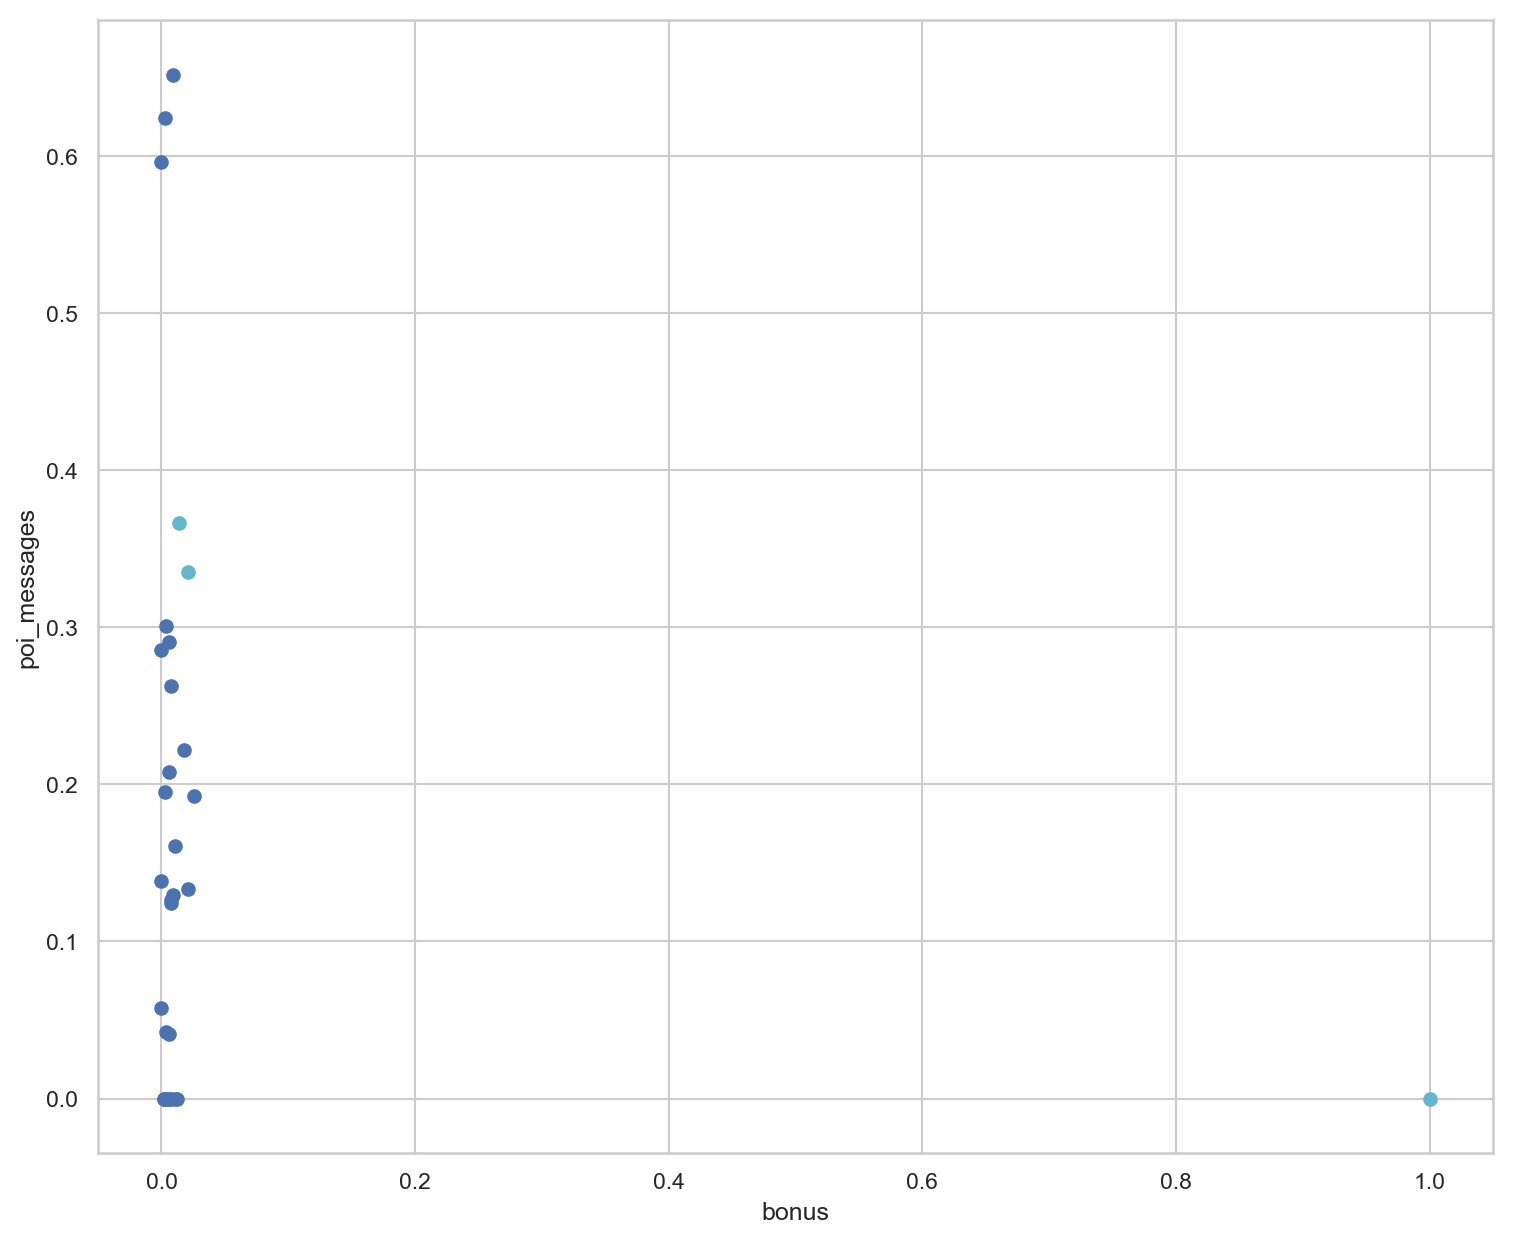

In [1047]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 4, 6, 8, 10, 20, 30, 40]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid)

clf.fit(X=features_train, y=labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_

# ('DECISION TREE Accuracy with ALL features:', 0.8571428571428571)
# ('DECISION TREE (salary & bonus) Accuracy Before MinMaxScaler:', 0.7857142857142857)
# ('DECISION TREE (salary & bonus) Accuracy After MinMaxScaler:', 0.7586206896551724)
# ("DECISION TREE Accuracy: 'long_term_incentive', 'bonus'", 0.8888888888888888)
# ("DECISION TREE ('long_term_incentive', 'exercised_stock_options') Accuracy:", 0.8571428571428571)
# ("DECISION TREE ('long_term_incentive', 'total_payments') Accuracy:", 0.7368421052631579)
# ("DECISION TREE ('long_term_incentive', 'salary') Accuracy:", 0.7241379310344828)
# ('DECISION TREE Accuracy: PCA', 0.8518518518518519)
# ('DECISION TREE Accuracy: WITHOUT PCA and LTI + exercised_stock_options', 0.8857142857142857)
# 3 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.91      0.97      0.94        30
#          POI       0.67      0.40      0.50         5


# ('DECISION TREE Accuracy:', 0.9142857142857143)
# 2 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.91      1.00      0.95        30
#          POI       1.00      0.40      0.57         5
# ('DECISION TREE Accuracy: deferred_income x bonus', 0.6896551724137931)
# ('DECISION TREE Accuracy: deferral_payments x bonus', 0.8666666666666667)
# 3 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.89      0.96      0.92        25
#          POI       0.67      0.40      0.50         5

# ('DECISION TREE Accuracy: deferral_payments x deferred_income', 0.8095238095238095)
            
print("DECISION TREE Accuracy: {} x {}".format(feature_1, feature_2), acc)

# print("{} predictions / {} test data points".format(len(pred), len(features_test)))
# print(list(pred))

printPredictions(pred, labels_test)

printValidationReports(labels_test, pred)

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)

# ADA BOOST

Best estimator found by grid search:
AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=25, random_state=1)
('AdaBoost Accuracy: bonus x poi_messages', 0.7666666666666667)

30 predictions / 30 test data points


/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'PREDICTIONS: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0


'TEST: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


3 POIs detected

              precision    recall  f1-score   support

     NOT POI       0.81      0.92      0.86        24
         POI       0.33      0.17      0.22         6

   micro avg       0.77      0.77      0.77        30
   macro avg       0.57      0.54      0.54        30
weighted avg       0.72      0.77      0.73        30

[[22  2]
 [ 5  1]]


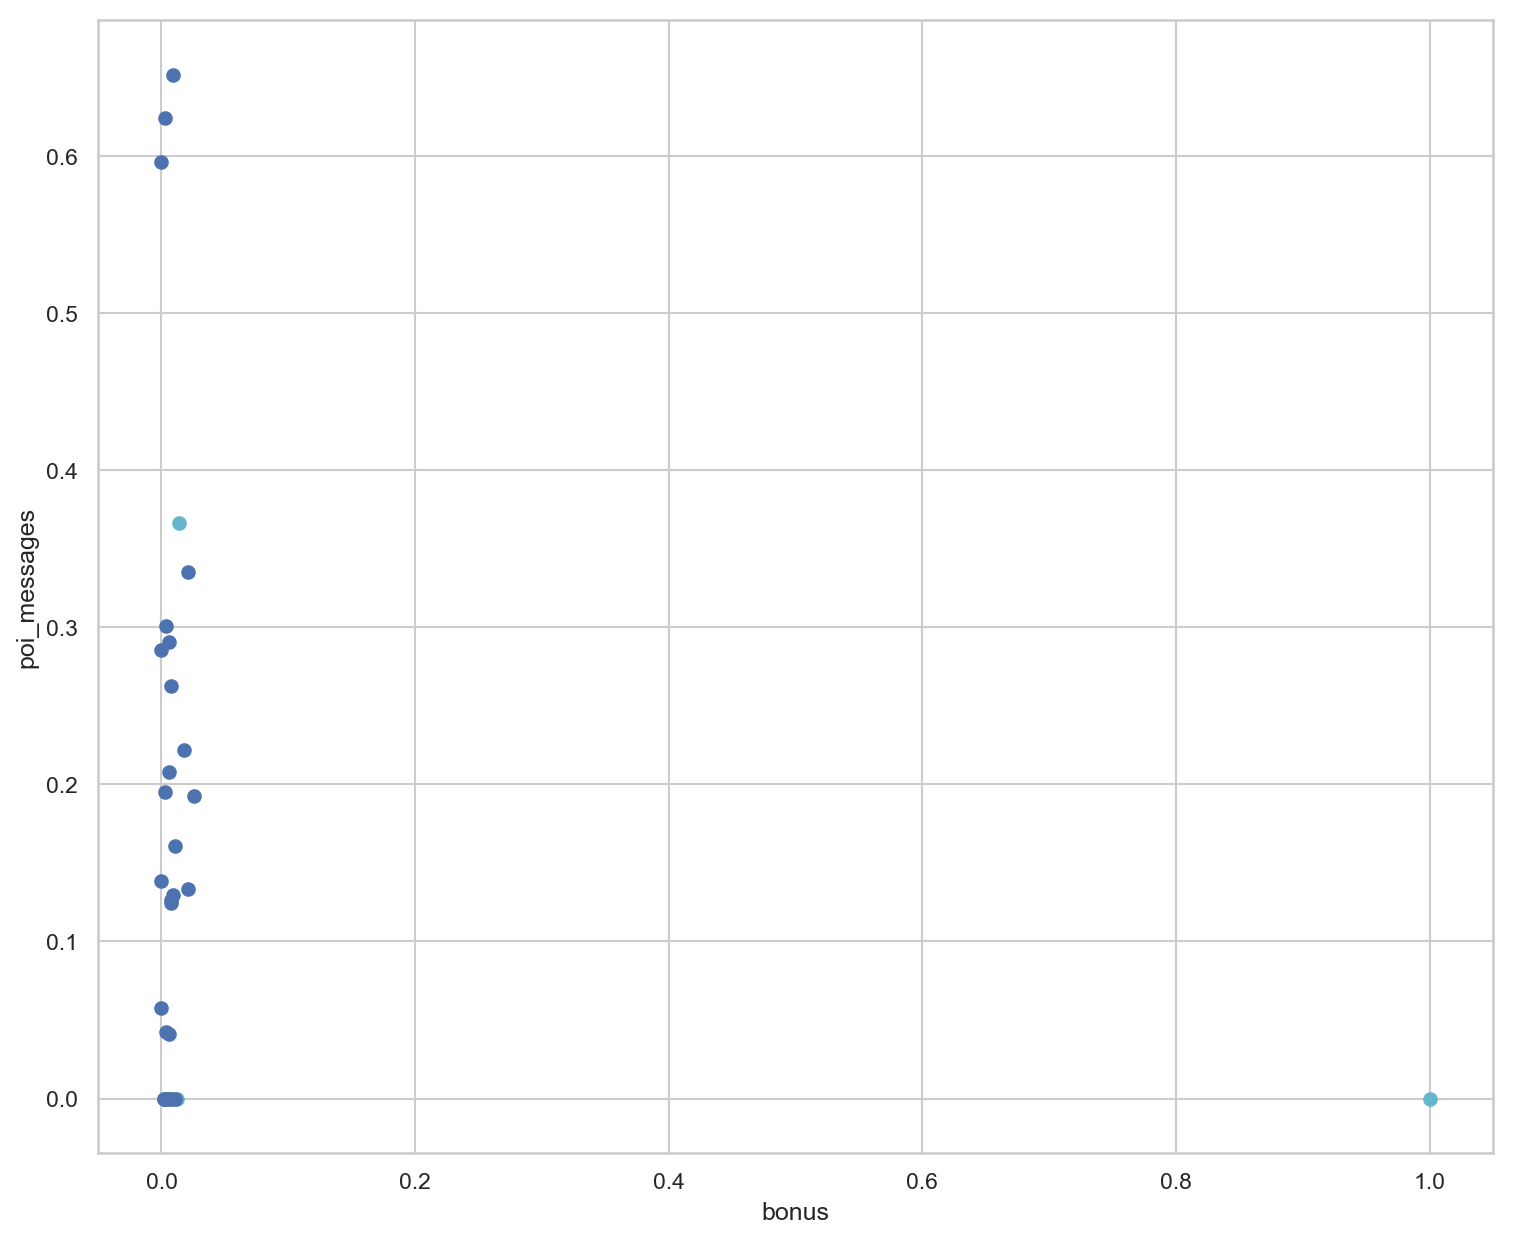

In [1048]:
param_grid = {
    "n_estimators": [25, 50, 75, 100],
    "algorithm": ['SAMME', "SAMME.R"]
}

clf = GridSearchCV(AdaBoostClassifier(random_state=1), param_grid)

clf.fit(X=features_train, y=labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_

# ("AdaBoost ('long_term_incentive', 'bonus') Accuracy:", 0.9259259259259259)
# ('AdaBoost TREE Accuracy ALL FEATURES:', 0.9047619047619048)
# ('AdaBoost TREE Accuracy: PCA', 0.8518518518518519)
# ('AdaBoost TREE Accuracy: NO PCA and LTI + exercised_stock_options', 0.8571428571428571)
# 2 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.88      0.97      0.92        30
#          POI       0.50      0.20      0.29         5


# ('AdaBoost Accuracy: deferred_income x bonus', 0.7241379310344828)
# ('AdaBoost Accuracy: deferral_payments x bonus', 0.7666666666666667)
# 8 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.91      0.80      0.85        25
#          POI       0.38      0.60      0.46         5

# ('AdaBoost Accuracy: deferral_payments x deferred_income', 0.8571428571428571)
print("AdaBoost Accuracy: {} x {}".format(feature_1, feature_2), acc)

printPredictions(pred, labels_test)

printValidationReports(labels_test, pred)

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)


# RandomForestClassifier

Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)
('Random Forest Accuracy: deferred_income x bonus', 0.7931034482758621)

29 predictions / 29 test data points


/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'PREDICTIONS: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


'TEST: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0


5 POIs detected

              precision    recall  f1-score   support

     NOT POI       0.88      0.88      0.88        24
         POI       0.40      0.40      0.40         5

   micro avg       0.79      0.79      0.79        29
   macro avg       0.64      0.64      0.64        29
weighted avg       0.79      0.79      0.79        29

[[21  3]
 [ 3  2]]


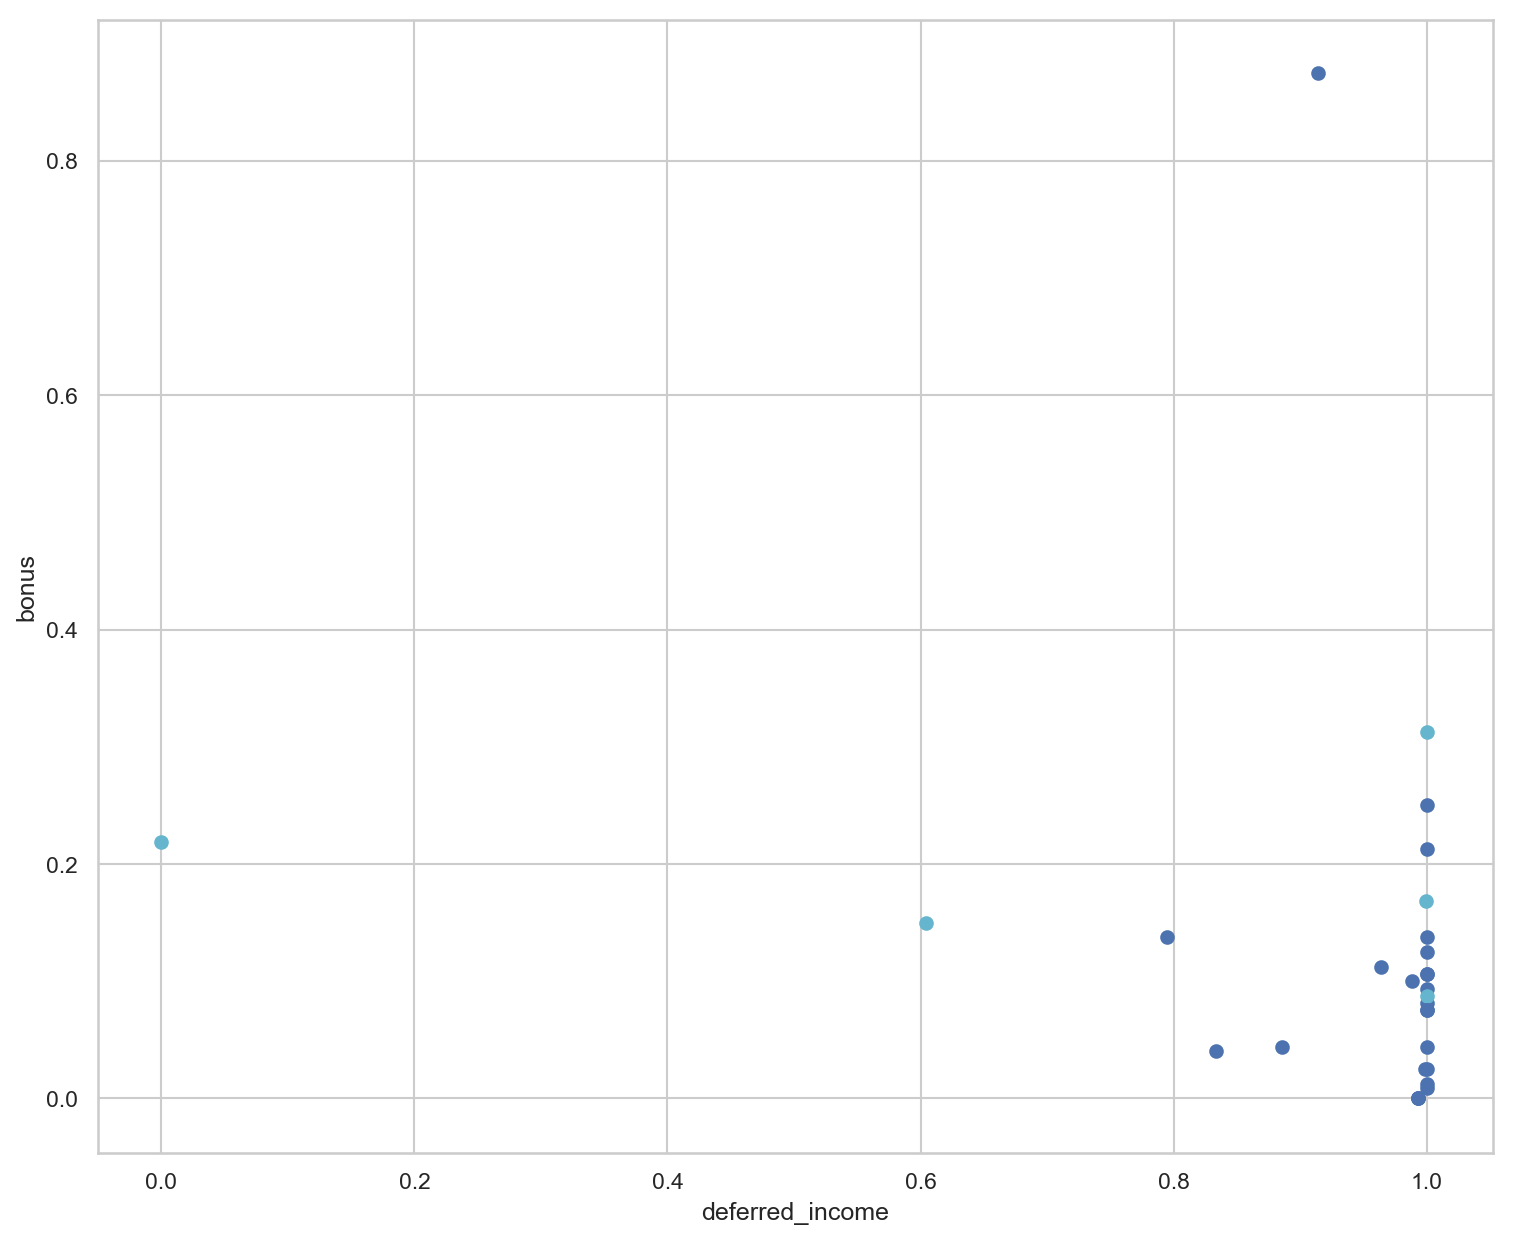

In [862]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "n_estimators": [5, 10, 25, 50, 75, 100],
    "max_depth": [2, 4, 6, 8, 10, 20],
    "min_samples_split": [2, 6, 10, 20, 30],
    "class_weight": ["balanced", "balanced_subsample"]
}


clf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid)
# clf.fit(X=features_train, y=labels_train)
clf.fit(X=features_train, y=labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_

# ('Random Forest Accuracy:', 0.9761904761904762)
# ('Random Forest Accuracy ALL features + MinMax:', 0.9285714285714286)
# ('Random Forest Accuracy:', 0.8518518518518519)
# ('Random Forest Accuracy PCA:', 0.8888888888888888)
# ('Random Forest Accuracy NO PCA  and LTI + exercised_stock_options:', 0.8285714285714286)

# ('Random Forest Accuracy: deferred_income x bonus', 0.7931034482758621)
# 5 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.88      0.88      0.88        24
#          POI       0.40      0.40      0.40         5

print("Random Forest Accuracy: {} x {}".format(feature_1, feature_2), acc)

printPredictions(pred, labels_test)

printValidationReports(labels_test, pred)
# 3 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.88      0.93      0.90        30
#          POI       0.33      0.20      0.25         5

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)

# KNeighborsClassifier

Best estimator found by grid search:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=1,
           weights='uniform')
('KNN Accuracy: deferral_payments x bonus', 0.7333333333333333)

30 predictions / 30 test data points


/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'PREDICTIONS: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0


'TEST: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0


5 POIs detected

              precision    recall  f1-score   support

     NOT POI       0.84      0.84      0.84        25
         POI       0.20      0.20      0.20         5

   micro avg       0.73      0.73      0.73        30
   macro avg       0.52      0.52      0.52        30
weighted avg       0.73      0.73      0.73        30

[[21  4]
 [ 4  1]]


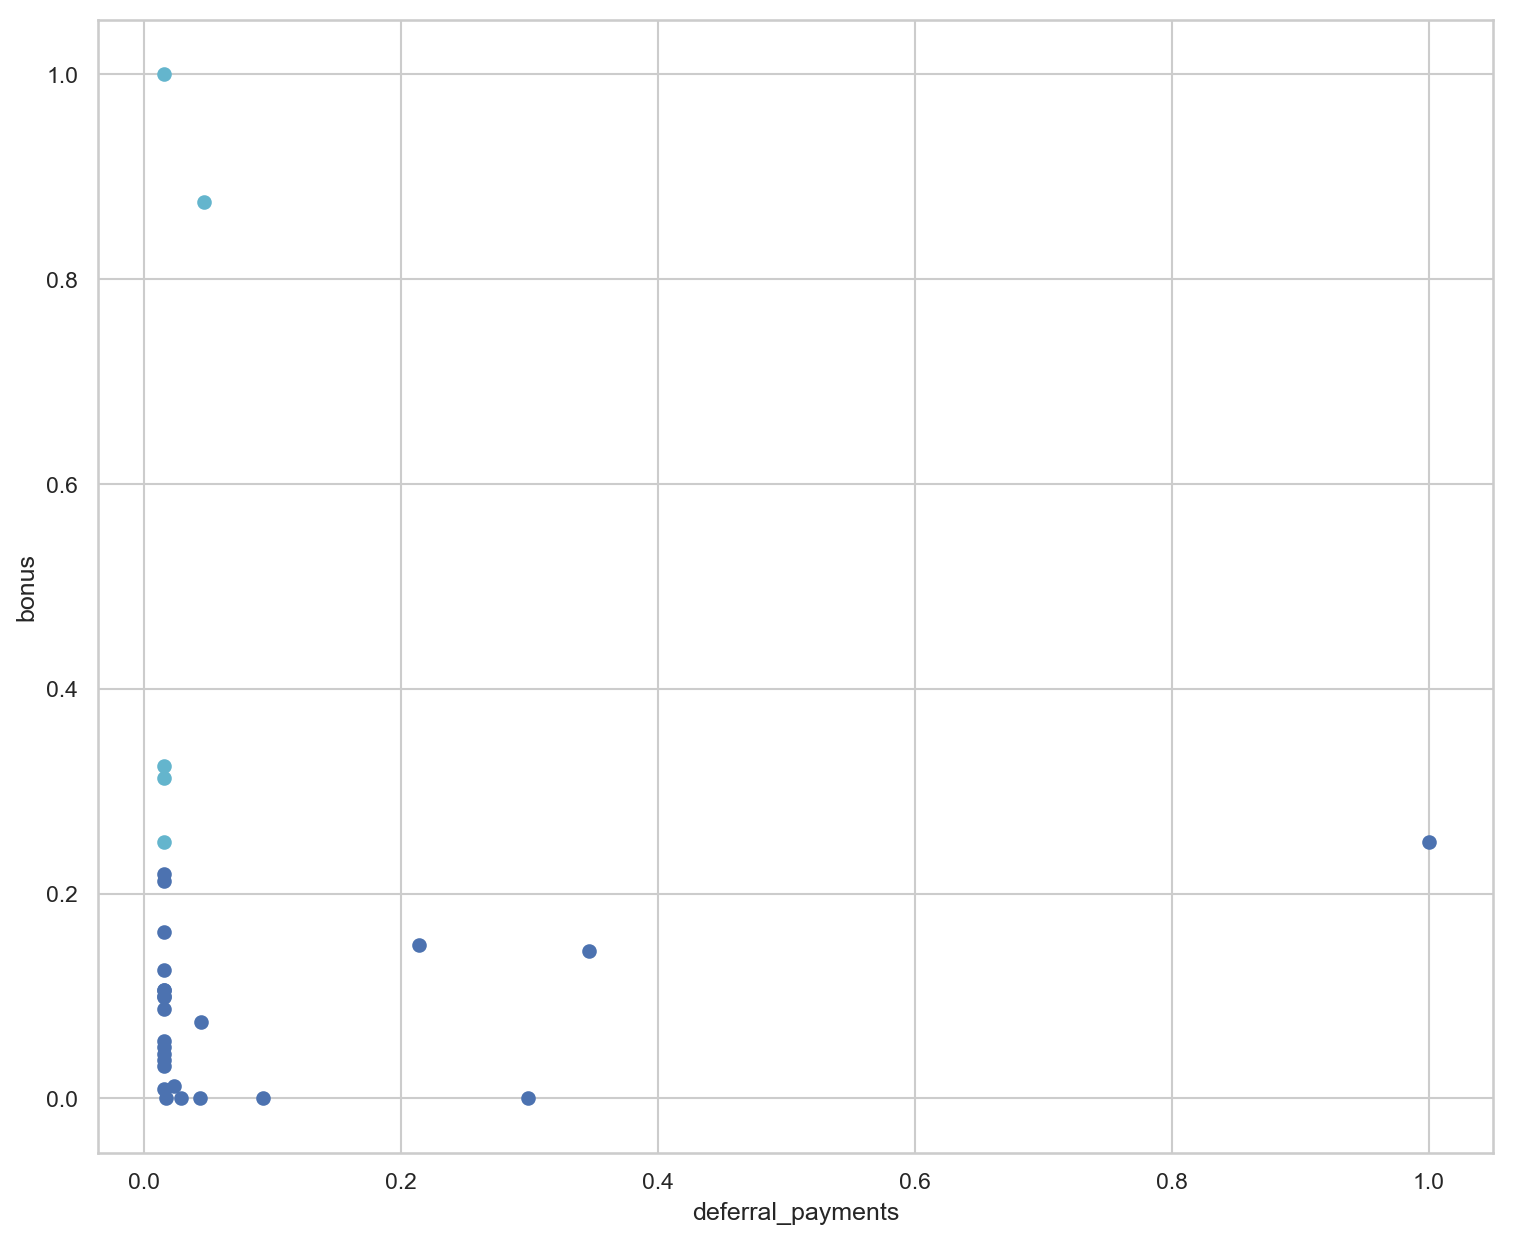

In [870]:
param_grid = {
    "n_neighbors": [2, 4, 6, 8, 10],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute', 'auto'],
    "leaf_size": [5, 10, 20, 30, 40, 50, 60],
    "p": [1, 2]
}

clf = GridSearchCV(KNeighborsClassifier(n_neighbors=3, weights="uniform", leaf_size=30, p=2), param_grid)

clf.fit(X=features_train, y=labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

print "Best estimator found by grid search:"
print clf.best_estimator_


# ('KNN Accuracy With ALL before MinMaxScale:', 0.9523809523809523)
# ('KNN Accuracy after scaling:', 0.8518518518518519)
# ('KNN Accuracy With ALL after MinMax:', 0.9285714285714286)
# ('KNN Accuracy: WithALL after MinMax and tuning', 0.9761904761904762)
# ('KNN Accuracy:', 0.8518518518518519)
# ('KNN Accuracy: With PCA', 0.8888888888888888)
# ('KNN Accuracy: without PCA and LTI + exercised_stock_options', 0.8571428571428571)
# 0 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.86      1.00      0.92        30
#          POI       0.00      0.00      0.00         5

# ('KNN Accuracy: deferred_income x bonus', 0.8275862068965517)
# 0 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.83      1.00      0.91        24
#          POI       0.00      0.00      0.00         5

# ('KNN Accuracy: deferral_payments x bonus', 0.7333333333333333)
print("KNN Accuracy: {} x {}".format(feature_1, feature_2), acc)

printPredictions(pred, labels_test)

printValidationReports(labels_test, pred)

Draw(
    pred.astype(int),
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)


/Users/afterlab/opt/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

Best estimator found by grid search:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)
('KMeans Accuracy: deferral_payments x bonus', 0.8)

30 predictions / 30 test data points


'PREDICTIONS: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


'TEST: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0


3 POIs detected

              precision    recall  f1-score   support

     NOT POI       0.85      0.92      0.88        25
         POI       0.33      0.20      0.25         5

   micro avg       0.80      0.80      0.80        30
   macro avg       0.59      0.56      0.57        30
weighted avg       0.77      0.80      0.78        30

[[23  2]
 [ 4  1]]


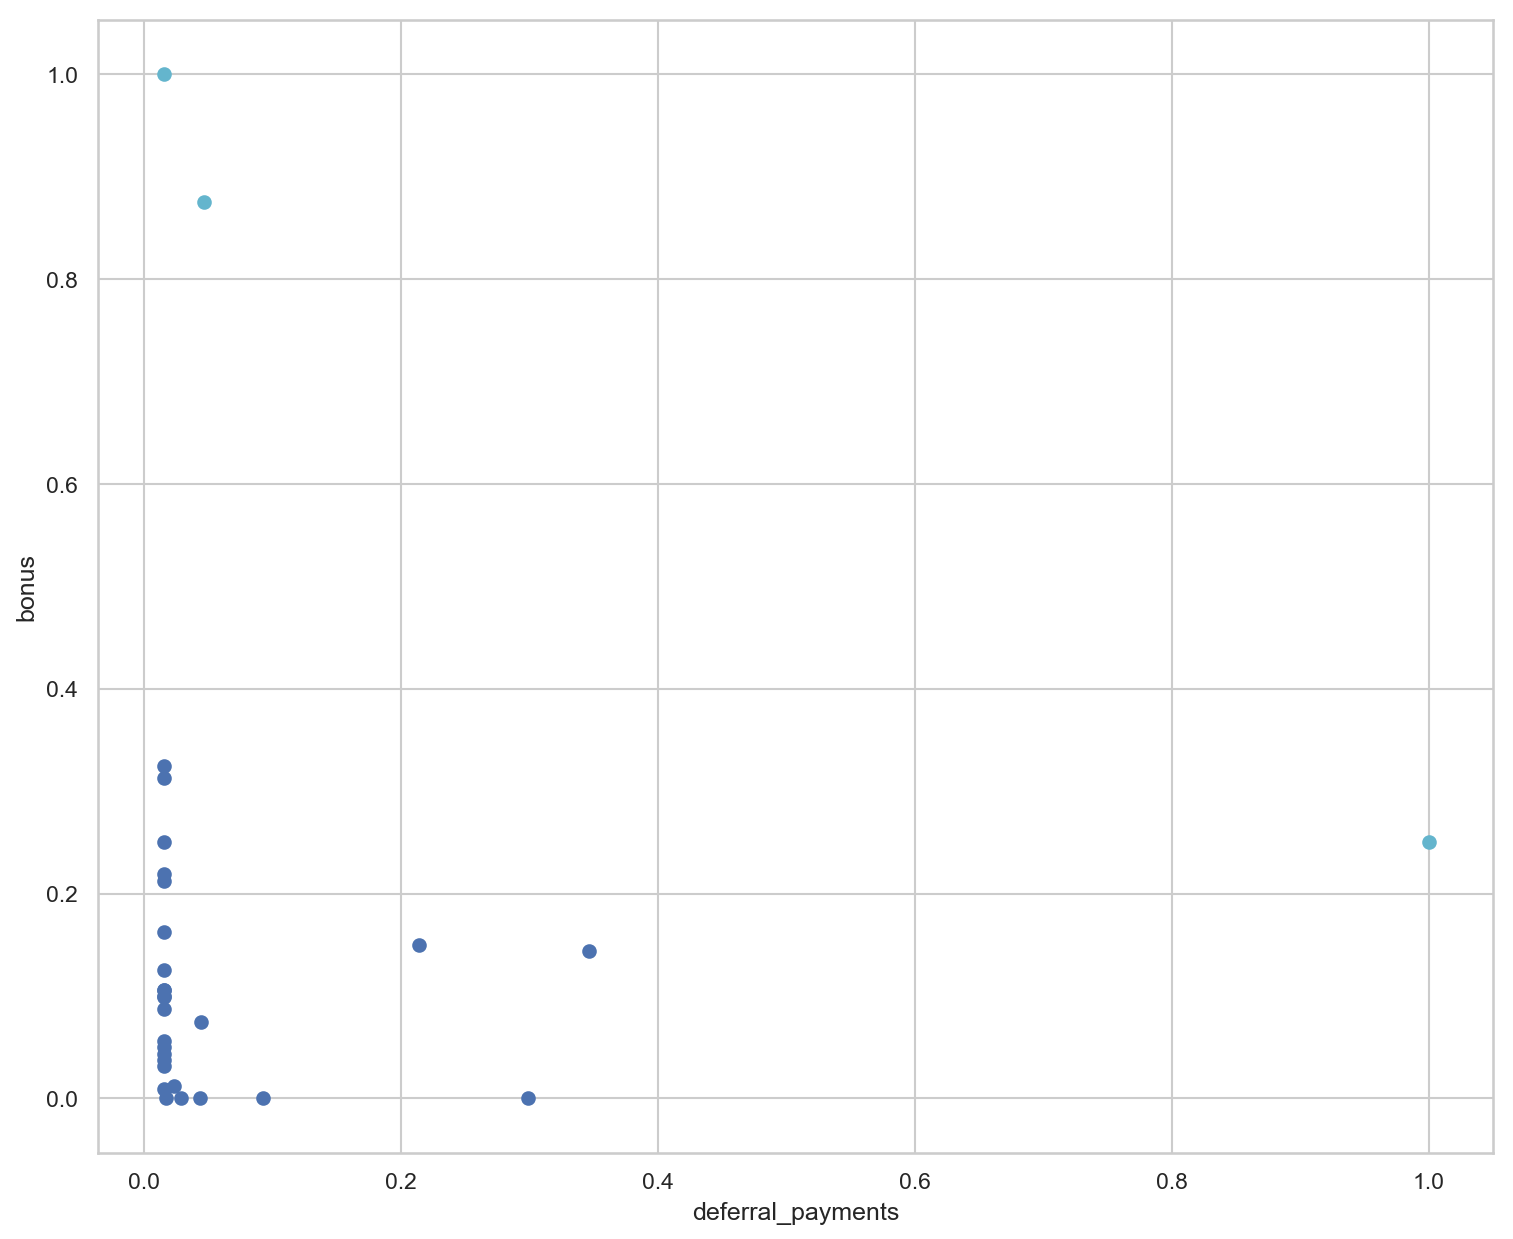

In [871]:
# KMEANS
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

param_grid = {
    "n_clusters": [2],
    "init": ['k-means++', 'random'],
    "n_init": [1,2,3,4,5, 10, 15, 20],
    "max_iter": [100, 200, 300, 400],
    "algorithm": ["auto", "full", "elkan"]
}

# KMeans?
# Compute k-means clustering.
kmeans = GridSearchCV(KMeans(random_state=1), param_grid)
kmeans.fit(X=features_train, y=labels_train)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(features_test)

display(pred)

# finance_features = zip(rescaled_salary, rescaled_stock)
# display(features_test)
print "Best estimator found by grid search:"
print kmeans.best_estimator_

acc = accuracy_score(
    y_true=labels_test, y_pred=pred, normalize=True, sample_weight=None
)

# ('Kmeans Accuracy with MinMax and 3 features:', 0.14814814814814814)
# ('Kmeans Accuracy: ALL features and MinMax', 0.47619047619047616)
# ('Kmeans Accuracy with PCA:', 0.14814814814814814)
# ('Kmeans Accuracy: without PCA and LTI + exercised_stock_options', 0.17142857142857143)
# 30 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.60      0.10      0.17        30
#          POI       0.10      0.60      0.17         5
# ('KMeans Accuracy: deferred_income x bonus', 0.8620689655172413)
# 1 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.86      1.00      0.92        24
#          POI       1.00      0.20      0.33         5
# ('KMeans Accuracy: deferral_payments x bonus', 0.8)
# 3 POIs detected

#               precision    recall  f1-score   support

#      NOT POI       0.85      0.92      0.88        25
#          POI       0.33      0.20      0.25         5            
print("KMeans Accuracy: {} x {}".format(feature_1, feature_2), acc)

printPredictions(pred, labels_test)

printValidationReports(labels_test, pred)

Draw(
    pred,
    features_test,
    poi,
    mark_poi=False,
    name="clusters.pdf",
    f1_name=feature_1,
    f2_name=feature_2,
)


In [756]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X=features_train, y=labels_train)

# >>> print(clf.coef_)
# [0.85 0.  ]
# >>> print(clf.intercept_)
# 0.15...

# features_to_predict_labels_for = [1,2]
# clf.predict([features_to_predict_labels_for])
clf.coef_

array([0., 0.])

# Task 5: Tune your classifier

In [708]:
from sklearn.preprocessing import MinMaxScaler

weights = np.array([[115.0], [140.0], [175.0]])
scaler = MinMaxScaler()
rescaled_weight = scaler.fit_transform(weights)
rescaled_weight

array([[0.        ],
       [0.41666667],
       [1.        ]])

# Validation

In [750]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def printValidationReports(labels_test, pred):
    # Build a text report showing the main classification metrics.
    print classification_report(y_true=labels_test, y_pred=pred, target_names=['NOT POI', 'POI'])

    # Compute confusion matrix to evaluate the accuracy of a classification.
    print confusion_matrix(y_true=labels_test, y_pred=pred)

# Task 6: Display

In [394]:
dump_classifier_and_data(clf, my_dataset, features_list)